In [3]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt

import nibabel as nib

Let's say I have a neural vector with a couple of spikes:

In [5]:
times = np.arange(0, 60, 0.5)  # samples every 0.5 seconds
times

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5])

In [7]:
times.shape, times.size

((120,), 120)

In [8]:
neural_vector = np.zeros(times.shape)
neural_vector.shape, neural_vector.size

((120,), 120)

In [9]:
neural_vector[10] = 1  # At 5 seconds ---> the item number 10 is 1

In [10]:
neural_vector[20] = 1  # At 10 seconds ---> the item number 20 is 1

In [11]:
neural_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

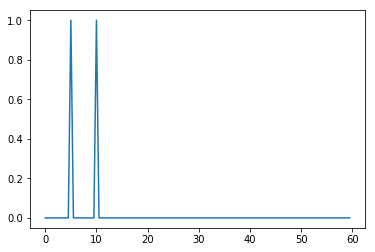

In [12]:
plt.plot(times, neural_vector)

Then I have my HRF function, sampled every half second, to match:

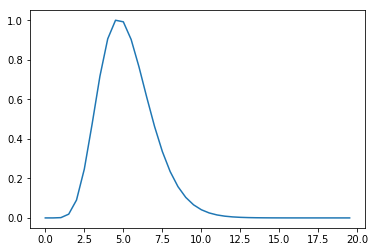

In [13]:
def hrf(t):
    "A hemodynamic response function"
    values = t ** 8.6 * np.exp(-t / 0.547)
    # Scale max to 1
    return values / np.max(values)

hrf_times = np.arange(0, 20, 0.5)
hrf_samples = hrf(hrf_times)
plt.plot(hrf_times, hrf_samples)

The input neural vector is length 120, and the HRF vector is length 40:

In [14]:
print(len(neural_vector))
print(len(hrf_samples))

120
40


For reasons that may be familiar to you now, when we convolve the neural vector with the hrf signal, we get an output that is length 120 + 40 - 1 = 159:

In [15]:
hemodynamic_prediction = np.convolve(neural_vector, hrf_samples)
len(hemodynamic_prediction)

159

This is because of the HRF falling off the end of the input vector.  The value at index 120 in the new vector refers to time 60, and value 121 refers to time 60.5 seconds.  To retain only the values in the new hemodynamic vector that refer to times up to (not including) 60s, we can just drop the last `len(hrf_signal) - 1` values:

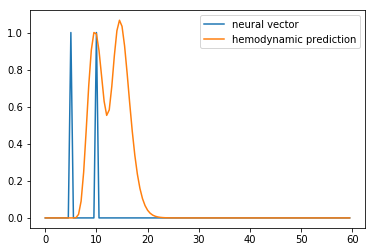

In [16]:
hemodynamic_for_60s = hemodynamic_prediction[:len(neural_vector)]
plt.plot(times, neural_vector, label='neural vector')
plt.plot(times, hemodynamic_for_60s, label='hemodynamic prediction')
plt.legend()